In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
plt.style.use('ggplot')
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.facecolor'] = 'white'

In [3]:
def getGalaxyData(snapshot):
    return np.genfromtxt('./Data/GalaxyData/GalaxyData_Snap.'+str(snapshot)+'.txt')
def getWebData(snapshot):
    return np.genfromtxt('./Data/WebData/galaxy_web_data.'+str(snapshot)+'.txt')

snap:  135  with bin from  0.0  to  0.2  has N entries:  154
snap:  135  with bin from  0.2  to  0.4  has N entries:  213
snap:  135  with bin from  0.4  to  0.6  has N entries:  86
snap:  135  with bin from  0.0  to  0.2  has N entries:  366
snap:  135  with bin from  0.2  to  0.4  has N entries:  629
snap:  135  with bin from  0.4  to  0.6  has N entries:  348
snap:  135  with bin from  0.6  to  0.8  has N entries:  26


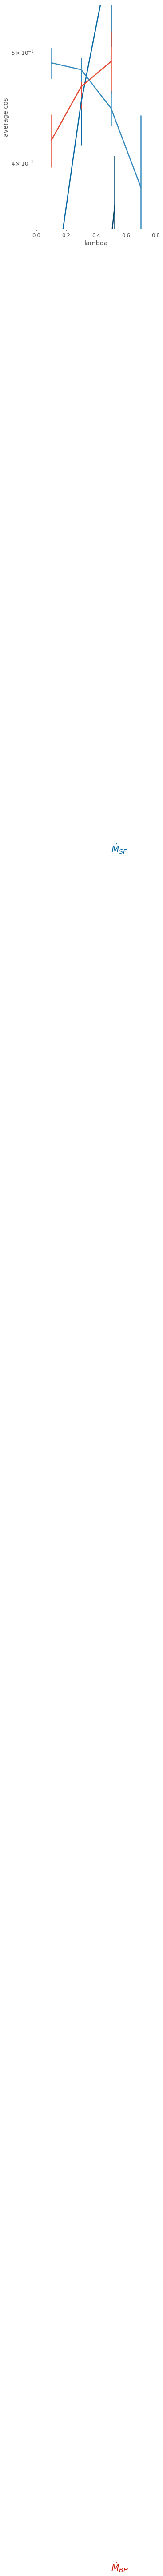

In [9]:
def plotCos(thisPlot,snapshot,nBins,lowLim,highLim,spiEllip=1,massCut=10,plusMinus=1):
    galData=getGalaxyData(snapshot)
    webData=getWebData(snapshot)
    edges=np.linspace(lowLim,highLim,nBins+1)
    middles=edges[:-1]+(highLim-lowLim)/(2*nBins)
    average=np.zeros(nBins)
    err=np.zeros(nBins)
    for i in range(nBins):
        inBin=np.argwhere((galData[:,17]>edges[i]) & (galData[:,17]<edges[i+1])
                         & (spiEllip*galData[:,14]<spiEllip*0.5) & (webData[:,17]==0)
                         & (plusMinus*galData[:,2]>plusMinus*massCut))
        print('snap: ',snapshot,' with bin from ',edges[i],' to ',edges[i+1],' has N entries: ',inBin.size)
        average[i]=np.median(np.abs(webData[inBin,15]))
        err[i]=np.std(np.abs(webData[inBin,15]))/np.sqrt(inBin.size)
    thisPlot.errorbar(middles,average,yerr=err)

cosLambda=plt.gca()
plotCos(cosLambda,135,3,0,0.6,massCut=5)
plotCos(cosLambda,135,4,0,0.8,massCut=5,plusMinus=-1)
#plotCos(cosLambda,116,2,0.1,0.5,massCut=5)
#plotCos(cosLambda,103,3,0,0.6,massCut=5,plusMinus=-1)
cosLambda.set_xlim(0,0.8)
cosLambda.set_ylim(0.35,0.55)
cosLambda.set_xlabel('lambda')
cosLambda.set_ylabel('average cos')
plt.show()

In [10]:
def plotAgn(thisPlot,snapshot,nBins,lowLim,highLim,spiEllip=1,massCut=10,plusMinus=1,colour='k'):
    galData=getGalaxyData(snapshot)
    edges=np.linspace(lowLim,highLim,nBins+1)
    middles=edges[:-1]+(highLim-lowLim)/(2*nBins)
    average=np.zeros(nBins)
    err=np.zeros(nBins)
    for i in range(nBins):
        inBin=np.argwhere((galData[:,17]>edges[i]) & (galData[:,17]<edges[i+1])
                         & (spiEllip*galData[:,14]<spiEllip*0.5)
                         & (plusMinus*galData[:,2]>plusMinus*massCut))
        print('snap: ',snapshot,' with bin from ',edges[i],' to ',edges[i+1],' has N entries: ',inBin.size)
        average[i]=np.mean(np.abs(galData[inBin,19]))
        err[i]=np.std(np.abs(galData[inBin,19]))/np.sqrt(inBin.size)
    thisPlot.errorbar(middles,average,yerr=err,c=colour)
    print(average)
def plotSfr(thisPlot,snapshot,nBins,lowLim,highLim,spiEllip=1,massCut=10,plusMinus=1,colour='k'):
    galData=getGalaxyData(snapshot)
    edges=np.linspace(lowLim,highLim,nBins+1)
    middles=edges[:-1]+(highLim-lowLim)/(2*nBins)
    average=np.zeros(nBins)
    err=np.zeros(nBins)
    for i in range(nBins):
        inBin=np.argwhere((galData[:,17]>edges[i]) & (galData[:,17]<edges[i+1])
                         & (spiEllip*galData[:,14]<spiEllip*0.5)
                         & (plusMinus*galData[:,2]>plusMinus*massCut))
        print('snap: ',snapshot,' with bin from ',edges[i],' to ',edges[i+1],' has N entries: ',inBin.size)
        average[i]=np.mean(np.abs(galData[inBin,20]))
        err[i]=np.std(np.abs(galData[inBin,20]))/np.sqrt(inBin.size)
    thisPlot.errorbar(middles,average,yerr=err,c=colour)
    print(average)
fig = plt.figure(figsize=(5,8))
mDotPlot = plt.gca()
agnCmap=mpl.cm.get_cmap('OrRd')
sfrCmap=mpl.cm.get_cmap('PuBu')
plotAgn(mDotPlot,135,4,0,0.6,massCut=5,colour=agnCmap(0.95))
plotAgn(mDotPlot,116,3,0,0.6,massCut=5,colour=agnCmap(0.8))
plotAgn(mDotPlot,105,3,0,0.7,massCut=5,colour=agnCmap(0.65))
plotAgn(mDotPlot,85,3,0,0.7,massCut=5,colour=agnCmap(0.5))
mDotPlot.text(0.5,10**-2.5,r'$\dot{M}_{BH}$',fontsize=20,color=agnCmap(0.8))
plotSfr(mDotPlot,135,4,0,0.6,massCut=5,colour=sfrCmap(0.95))
plotSfr(mDotPlot,116,3,0,0.6,massCut=5,colour=sfrCmap(0.8))
plotSfr(mDotPlot,105,3,0,0.7,massCut=5,colour=sfrCmap(0.65))
plotSfr(mDotPlot,85,3,0,0.7,massCut=5,colour=sfrCmap(0.5))
mDotPlot.text(0.5,10**-1,r'$\dot{M}_{SF}$',fontsize=20,color=sfrCmap(0.8))
mDotPlot.set_xlim(0,0.65)
mDotPlot.set_ylim(10**-3.5,10**0.5)
mDotPlot.set_xlabel(r'$\lambda_R$')
mDotPlot.set_ylabel(r'$\dot{M}\ \ (10^{10} M_\odot Gyr^{-1})$')
mDotPlot.set_yscale('log')
mDotPlot.set_facecolor('white')
plt.tight_layout()
plt.savefig('Plots/FeedbackZ0.pdf')

snap:  135  with bin from  0.0  to  0.15  has N entries:  250
snap:  135  with bin from  0.15  to  0.3  has N entries:  338
snap:  135  with bin from  0.3  to  0.45  has N entries:  211
snap:  135  with bin from  0.45  to  0.6  has N entries:  109
[ 0.00175375  0.00080979  0.00080428  0.00076457]
snap:  116  with bin from  0.0  to  0.2  has N entries:  282
snap:  116  with bin from  0.2  to  0.4  has N entries:  313
snap:  116  with bin from  0.4  to  0.6  has N entries:  125
[ 0.00386555  0.00216091  0.00148346]
snap:  105  with bin from  0.0  to  0.233333333333  has N entries:  282
snap:  105  with bin from  0.233333333333  to  0.466666666667  has N entries:  273
snap:  105  with bin from  0.466666666667  to  0.7  has N entries:  64
[ 0.0039535   0.00230793  0.00137483]
snap:  85  with bin from  0.0  to  0.233333333333  has N entries:  112
snap:  85  with bin from  0.233333333333  to  0.466666666667  has N entries:  176
snap:  85  with bin from  0.466666666667  to  0.7  has N entries

116
3091


/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide


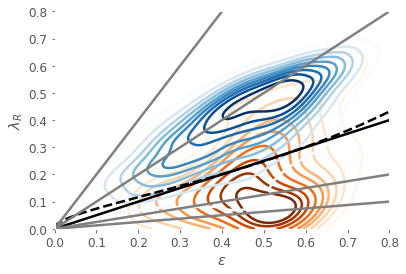

In [28]:
def lambda_cutoff(eps):
    e=np.sqrt(1-np.power(1-eps,2))
    o=0.5 * (np.arcsin(e)-e*np.sqrt(1-np.power(e,2))) / (e*np.sqrt(1-np.power(e,2)) - (1-np.power(e,2))*np.arcsin(e))
    d=0.7*eps
    v_s=np.sqrt((o*(1-d)-1)/(1+0.15*o*(1-d)))
    l=1.1*v_s/np.sqrt(1+(1.1**2)*np.power(v_s,2))
    l_cut=0.65*l
    return l_cut
from scipy import stats
def density_estimation(m1, m2,xMax=1,yMin=0,yMax=1):
    X, Y = np.mgrid[0:xMax:100j, yMin:yMax:100j]                                                     
    positions = np.vstack([X.ravel(), Y.ravel()])                                                       
    values = np.vstack([m1, m2])                                                                        
    kernel = stats.gaussian_kde(values)                                                                 
    Z = np.reshape(kernel(positions).T, X.shape)
    return X, Y, Z
def plotContour(whichPlot,galData,xData,xMin,xMax,yData,yMin,yMax,lowMass,highMass,colors=mpl.cm.jet):
    whichGal=np.argwhere((galData[:,2]>lowMass) & (galData[:,2]<highMass) & (galData[:,14]<0.5))
    print(whichGal.size)
    xData=xData[whichGal].T
    yData=yData[whichGal].T
    X, Y, Z = density_estimation(xData, yData,xMax=xMax,yMin=yMin,yMax=yMax)
    #finding levels by hand
    levels=np.zeros(9)
    total=Z.sum()
    for i in np.arange(1,10):
        frac=i/10
        #print(frac)
        thisLevel=Z.max()/2
        thisFrac=Z[Z>thisLevel].sum()/Z.sum()
        nStep=1
        while (np.abs(thisFrac - frac)>0.01):
            if(thisFrac>frac): #getting too much of the data
                thisLevel+=Z.max()/2.**(nStep+1)
            else:
                thisLevel-=Z.max()/2.**(nStep+1)
            thisFrac=Z[Z>thisLevel].sum()/Z.sum()
            if nStep==100:
                continue #so it doesn't run too long
            nStep+=1
        levels[9-i]=thisLevel
    #levels found
    whichPlot.contour(X,Y,Z,cmap=colors,levels=levels)
    whichPlot.set_facecolor('white') 

lambdaEps=plt.gca()
data=getGalaxyData(135)
eps=data[:,15]
lambdas=data[:,17]
x=np.linspace(0,1,1000)
plotContour(lambdaEps,data,eps,0,0.8,lambdas,0,0.8,10**1.5,1000,colors='Oranges')
plotContour(lambdaEps,data,eps,0,0.8,lambdas,0,0.8,0,10**1.5,colors='Blues')
lambdaEps.plot(x,0.5*x,c='k')
lambdaEps.plot(x,lambda_cutoff(x),c='k',ls='--')
lambdaEps.plot(x,x,c='grey')
lambdaEps.plot(x,2*x,c='grey')
lambdaEps.plot(x,x/4.,c='grey')
lambdaEps.plot(x,x/8,c='grey')
#plotContour(lambdaEps,data,10,10**1.5,colors=mpl.cm.Greens)
lambdaEps.set_xlim(0,0.8)
lambdaEps.set_ylim(0,0.8)
lambdaEps.set_ylabel(r'$\lambda_R$')
lambdaEps.set_xlabel(r'$\epsilon$')
lambdaEps.set_facecolor('white')
plt.show(lambdaEps)

2791
300
116
2791
300
116
2791
300
116
2791
300
116


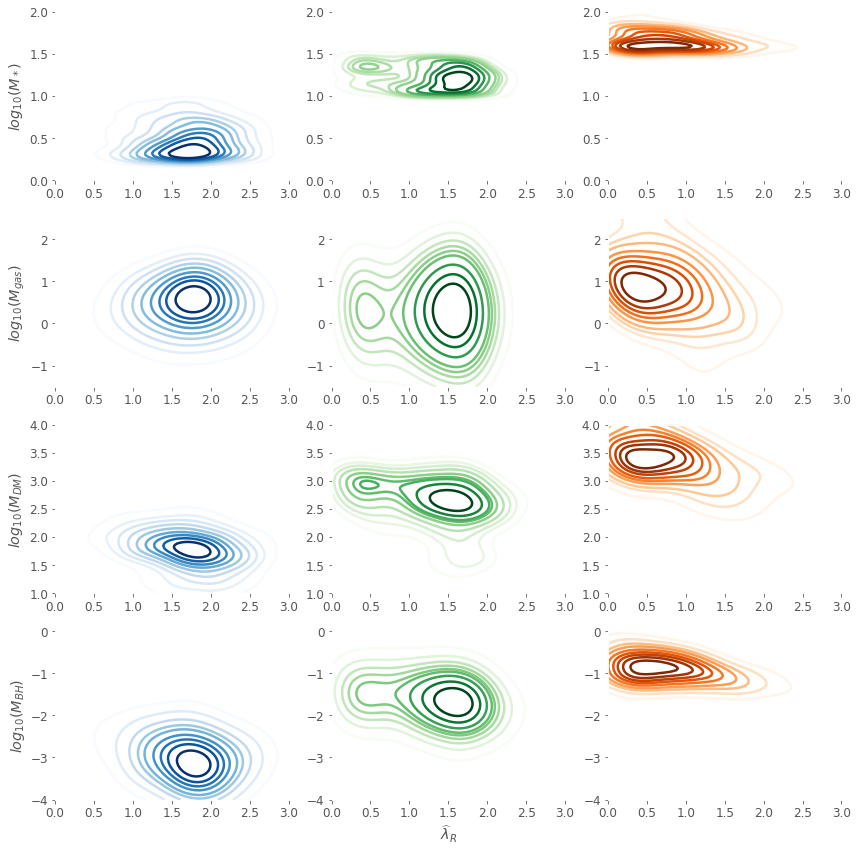

In [13]:

fig=plt.figure(figsize=(12,12))
lambdaGrid=mpl.gridspec.GridSpec(4,3)
data=getGalaxyData(135)
lambdaHat=data[:,16]
lMin=0
lMax=3
# stellar mass
mass=np.log10(data[:,2])
minLog=0
maxLog=2
lowMass=plt.subplot(lambdaGrid[0,0])
midMass=plt.subplot(lambdaGrid[0,1])
highMass=plt.subplot(lambdaGrid[0,2])
plotContour(lowMass,data,lambdaHat,lMin,lMax,mass,minLog,maxLog,0,10,colors='Blues')
plotContour(midMass,data,lambdaHat,lMin,lMax,mass,minLog,maxLog,10,10**1.5,colors='Greens')
plotContour(highMass,data,lambdaHat,lMin,lMax,mass,minLog,maxLog,10**1.5,1000,colors='Oranges')
lowMass.set_ylabel(r'$log_{10}(M_*)$')

# gas mass
gasMass=np.log10(data[:,3]+1e-10)
minLog=-1.5
maxLog=2.5
lowGasMass=plt.subplot(lambdaGrid[1,0])
midGasMass=plt.subplot(lambdaGrid[1,1])
highGasMass=plt.subplot(lambdaGrid[1,2])
plotContour(lowGasMass,data,lambdaHat,lMin,lMax,gasMass,minLog,maxLog,0,10,colors='Blues')
plotContour(midGasMass,data,lambdaHat,lMin,lMax,gasMass,minLog,maxLog,10,10**1.5,colors='Greens')
plotContour(highGasMass,data,lambdaHat,lMin,lMax,gasMass,minLog,maxLog,10**1.5,1000,colors='Oranges')
lowGasMass.set_ylabel(r'$log_{10}(M_{gas})$')

# dm mass
dmMass=np.log10(data[:,4])
minLog=1
maxLog=4
lowDMmass=plt.subplot(lambdaGrid[2,0])
midDMmass=plt.subplot(lambdaGrid[2,1])
highDMmass=plt.subplot(lambdaGrid[2,2])
plotContour(lowDMmass,data,lambdaHat,lMin,lMax,dmMass,minLog,maxLog,0,10,colors='Blues')
plotContour(midDMmass,data,lambdaHat,lMin,lMax,dmMass,minLog,maxLog,10,10**1.5,colors='Greens')
plotContour(highDMmass,data,lambdaHat,lMin,lMax,dmMass,minLog,maxLog,10**1.5,1000,colors='Oranges')
lowDMmass.set_ylabel(r'$log_{10}(M_{DM})$')

# bh mass
bhMass=np.log10(data[:,18]+1e-10)
minLog=-4
maxLog=0
lowBHmass=plt.subplot(lambdaGrid[3,0])
midBHmass=plt.subplot(lambdaGrid[3,1])
highBHmass=plt.subplot(lambdaGrid[3,2])
plotContour(lowBHmass,data,lambdaHat,lMin,lMax,bhMass,minLog,maxLog,0,10,colors='Blues')
plotContour(midBHmass,data,lambdaHat,lMin,lMax,bhMass,minLog,maxLog,10,10**1.5,colors='Greens')
plotContour(highBHmass,data,lambdaHat,lMin,lMax,bhMass,minLog,maxLog,10**1.5,1000,colors='Oranges')
lowBHmass.set_ylabel(r'$log_{10}(M_{BH})$')
midBHmass.set_xlabel(r'$\widehat{\lambda}_R$')
plt.tight_layout()
plt.show(lambdaGrid)

1
